# Importing Required Library

In [1]:
import random
import json
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from run_variant import run
from run_analysis import *
import utils

2025-05-05 15:34:29.169281: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 15:34:29.177856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-05 15:34:29.188343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-05 15:34:29.191426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-05 15:34:29.199060: I tensorflow/core/platform/cpu_feature_guar

# Single Variant Test

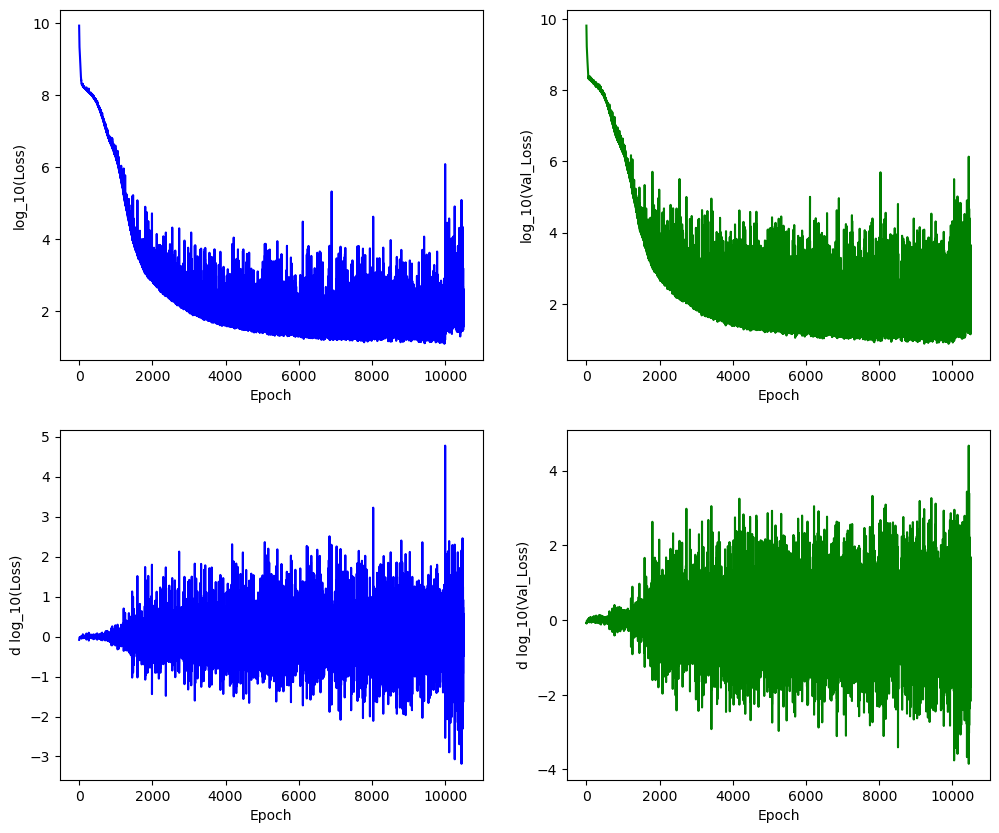

In [ ]:
test_result = "250505-long_ori.dat"
plot_loss(test_result)

In [7]:
main(f"data/output/{test_result}")

rms_deviation: 2.1971294250610773
std_difference: 2.0277515954621865
avg: -0.8497092525763487


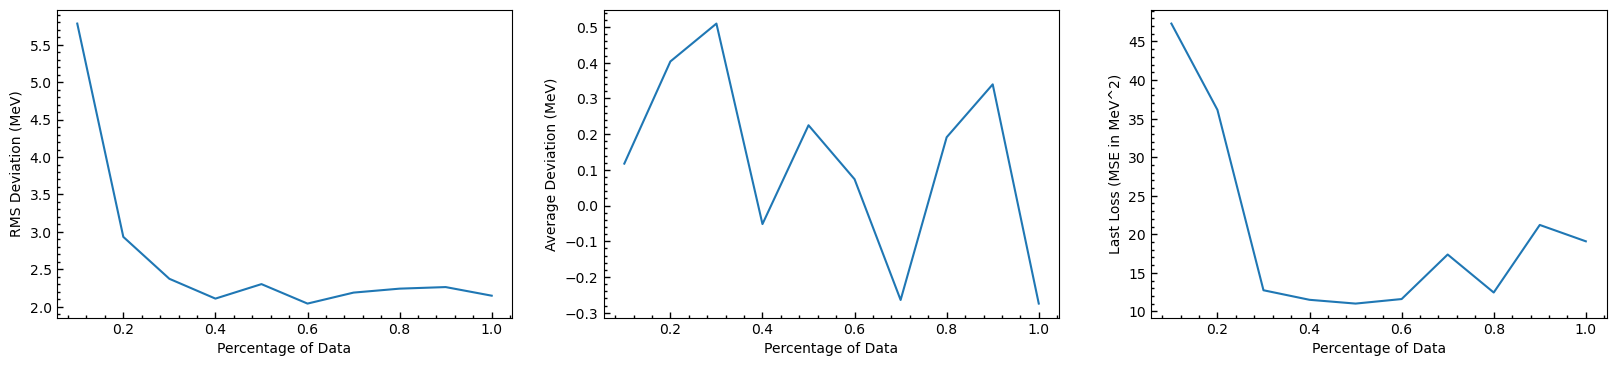

In [3]:
percentage_data = pd.read_csv("data/output/250505/percentage_effect.csv")
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].plot(percentage_data["Percentage"], percentage_data["rms_dev"])
axes[0].set_ylabel("RMS Deviation (MeV)")
axes[0].set_xlabel("Percentage of Data")
utils.set_tick(axes[0])

axes[1].plot(percentage_data["Percentage"], percentage_data["avg_dev"])
axes[1].set_ylabel("Average Deviation (MeV)")
axes[1].set_xlabel("Percentage of Data")
utils.set_tick(axes[1])

axes[2].plot(percentage_data["Percentage"], percentage_data["last_loss"])
axes[2].set_ylabel("Last Loss (MSE in MeV^2)")
axes[2].set_xlabel("Percentage of Data")
utils.set_tick(axes[2])

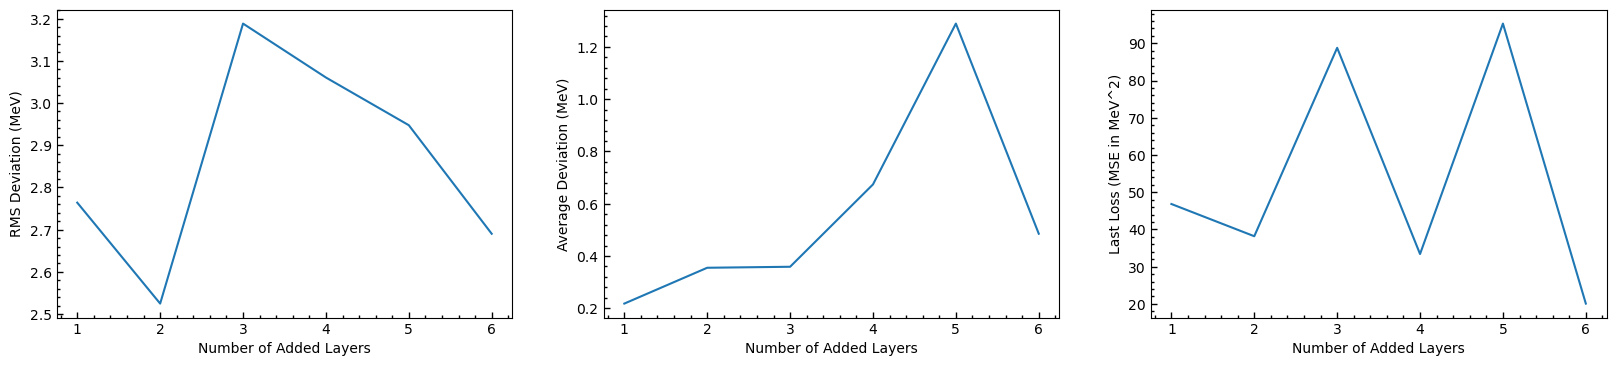

In [4]:
layer_data = pd.read_csv("data/output/250505/layer_effect.csv")
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].plot(layer_data["added_layers"], layer_data["rms_dev"])
axes[0].set_ylabel("RMS Deviation (MeV)")
axes[0].set_xlabel("Number of Added Layers")
utils.set_tick(axes[0])

axes[1].plot(layer_data["added_layers"], layer_data["avg_dev"])
axes[1].set_ylabel("Average Deviation (MeV)")
axes[1].set_xlabel("Number of Added Layers")
utils.set_tick(axes[1])

axes[2].plot(layer_data["added_layers"], layer_data["last_loss"])
axes[2].set_ylabel("Last Loss (MSE in MeV^2)")
axes[2].set_xlabel("Number of Added Layers")
utils.set_tick(axes[2])

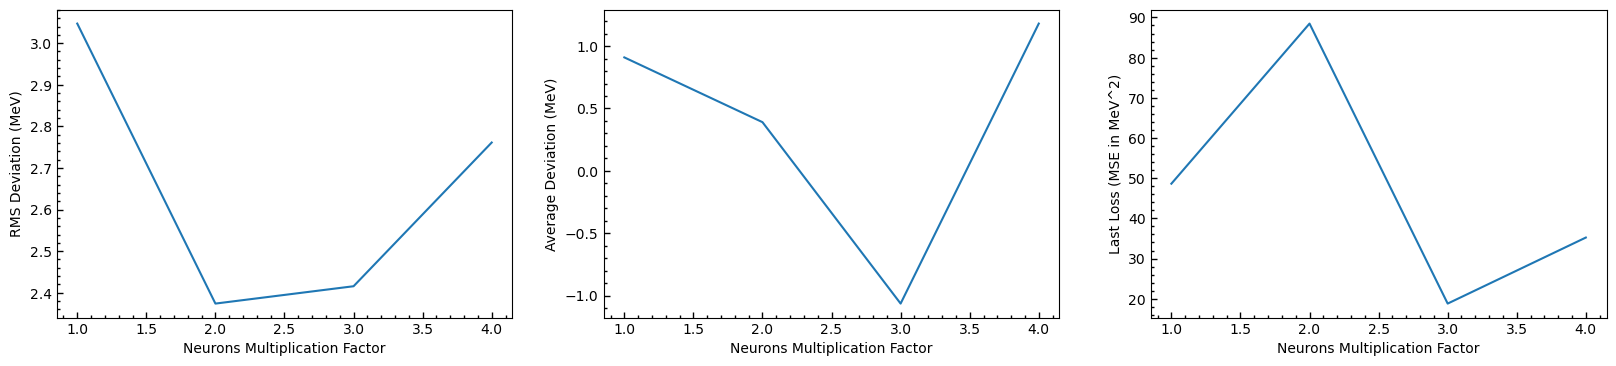

In [5]:
neurons_data = pd.read_csv("data/output/250505/neurons_effect.csv")
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

axes[0].plot(neurons_data["neurons_mult_f"], neurons_data["rms_dev"])
axes[0].set_ylabel("RMS Deviation (MeV)")
axes[0].set_xlabel("Neurons Multiplication Factor")
utils.set_tick(axes[0])

axes[1].plot(neurons_data["neurons_mult_f"], neurons_data["avg_dev"])
axes[1].set_ylabel("Average Deviation (MeV)")
axes[1].set_xlabel("Neurons Multiplication Factor")
utils.set_tick(axes[1])

axes[2].plot(neurons_data["neurons_mult_f"], neurons_data["last_loss"])
axes[2].set_ylabel("Last Loss (MSE in MeV^2)")
axes[2].set_xlabel("Neurons Multiplication Factor")
utils.set_tick(axes[2])